## First, Try to Implement the synthetic Toy Data Case

In [22]:
require('Synth')

# load data
data("synth.data")

# create matrices from panel data that provide inputs for synth
dataprep.out = dataprep(foo = synth.data, 
                        predictors = c("X1", "X2", "X3"), 
                        predictors.op = "mean", 
                        dependent = "Y", 
                        unit.variable = "unit.num",
                        time.variable = "year",
                        special.predictors = list(list("Y", 1991, "mean"),
                                                  list("Y", 1985, "mean"),
                                                  list("Y", 1980, "mean")),
                        treatment.identifier = 7, 
                        controls.identifier = c(29, 2, 13, 17, 32, 38),
                        time.predictors.prior = c(1984:1989),
                        time.optimize.ssr = c(1984:1990),
                        unit.names.variable = "name",
                        time.plot = 1984:1996)

synth.out = synth(dataprep.out)

# unit weights
synth.out$solution.w
# predictor weights
synth.out$solution.v


X1, X0, Z1, Z0 all come directly from dataprep object.


**************** 
 searching for synthetic control unit  
 

**************** 
**************** 
**************** 

MSPE (LOSS V): 4.709479 

solution.v:
 0.005382484 0.004487525 0.1875566 0.2556837 0.0001330583 0.5467566 

solution.w:
 1.8816e-06 0.004104966 0.1671817 0.220516 0.6081922 3.2802e-06 



,w.weight
2,1.881643e-06
13,4.104966e-03
17,1.671817e-01
29,2.205160e-01
32,6.081922e-01
38,3.280186e-06


,X1,X2,X3,special.Y.1991,special.Y.1985,special.Y.1980
BFGS,0.005382484,0.004487525,0.1875566,0.2556837,0.0001330583,0.5467566


In [26]:
gaps = dataprep.out$Y1plot-(dataprep.out$Y0plot%*%synth.out$solution.w); 
gaps

,7
1984,-0.1860330
1985,1.0834558
1986,0.8232554
1987,3.3445761
1988,-1.4720402
1989,-4.1906392
1990,-0.4069036
1991,0.4521608
1992,8.1763715
1993,12.9703706


In [28]:
synth.tables = synth.tab(
    dataprep.res = dataprep.out,
    synth.res = synth.out)
synth.tables

$tab.pred
               Treated Synthetic Sample Mean
X1               0.263     0.254       0.252
X2              15.467    17.177      17.044
X3              21.717    21.799      22.744
special.Y.1991 115.000   114.548     118.750
special.Y.1985 128.800   127.717     132.100
special.Y.1980 134.000   134.348     145.233

$tab.v
               v.weights
X1             0.005    
X2             0.004    
X3             0.188    
special.Y.1991 0.256    
special.Y.1985 0        
special.Y.1980 0.547    

$tab.w
   w.weights                  unit.names unit.numbers
2      0.000    control.region.southeast           29
13     0.004    control.region.northeast            2
17     0.167 control.region.southcentral           13
29     0.221         control.region.west           17
32     0.608      control.region.central           32
38     0.000         control.region.east           38

$tab.loss
        Loss W   Loss V
[1,] 0.0064483 4.709479

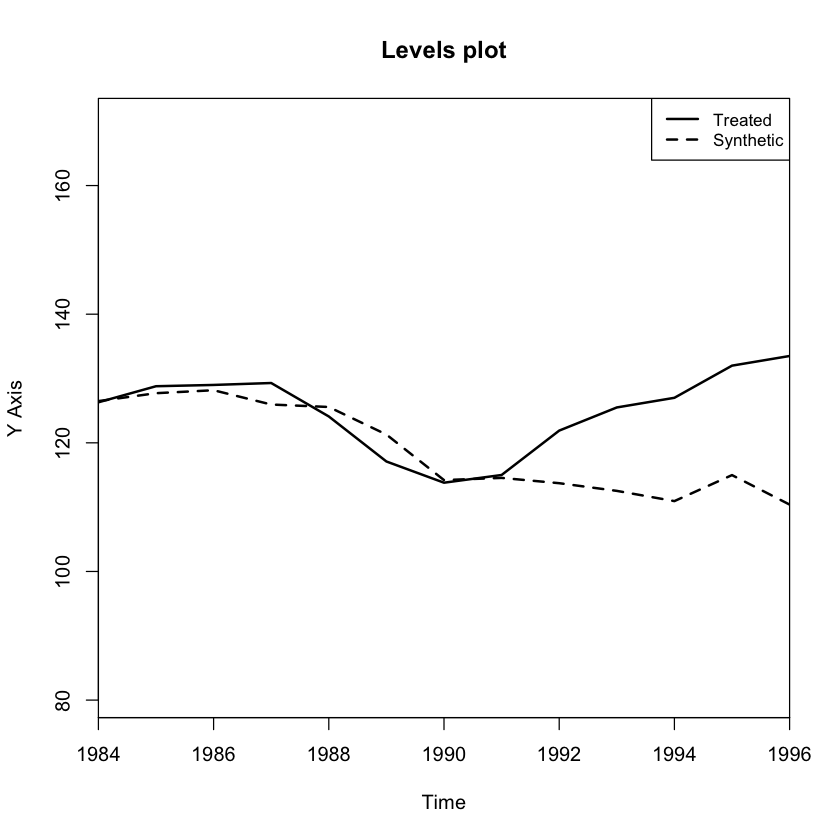

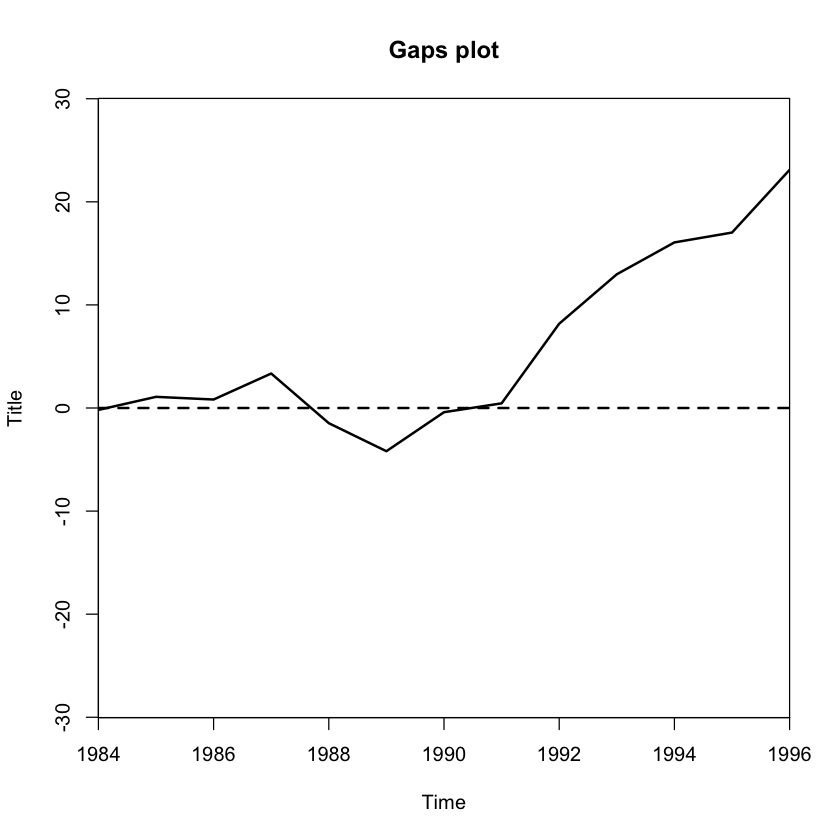

In [31]:
path.plot(dataprep.res = dataprep.out, synth.res = synth.out, Main = "Levels plot")
gaps.plot(dataprep.res = dataprep.out, synth.res = synth.out, Main = "Gaps plot")